Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

First time = 0.005986213684082031 seconds
Second time = 0.010007381439208984 seconds


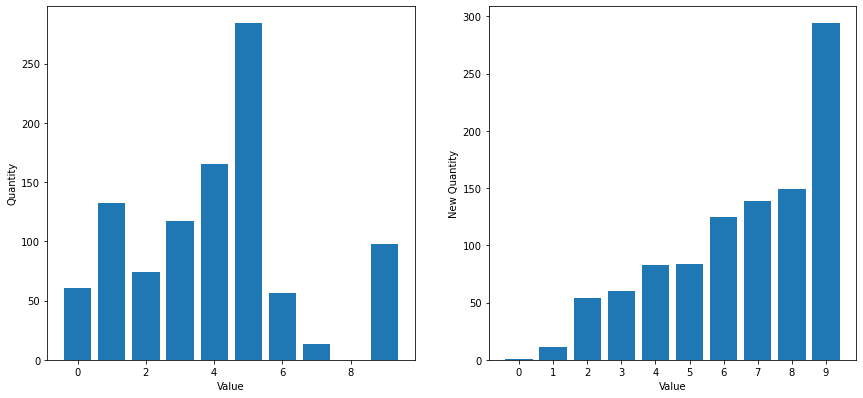

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

fig, ax = plt.subplots(1, 2)

mas = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
mas/=mas.sum()
mas_new = np.sort(mas)
def rng(mas):
    number = np.random.rand()
    pos = 0
    for i in range(10):
        if (pos < number <= pos + mas[i]):
            return i
        else:
            pos+=mas[i]
        

        
start = time.time()       
res = [rng(mas) for k in range(1000)]
end = time.time()
print("First time = %s seconds" % (end - start))

start = time.time()       
res_new = [rng(mas_new) for k in range(1000)]
end = time.time()
print("Second time = %s seconds" % (end - start))

count = np.empty(10)
count_new = np.empty(10)

for i in range(10):
    count[i] = res.count(i)
    count_new[i] = res_new.count(i)

x = np.arange(10)

plt.xticks(x)
ax[0].bar( x , count)
ax[0].set(xlabel ='Value', ylabel = ('Quantity'))

plt.xticks(x)
ax[1].bar( x , count_new)
ax[1].set(xlabel ='Value', ylabel = ('New Quantity'))

fig.set_size_inches(14.5, 6.5, forward=True)
plt.show()



Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

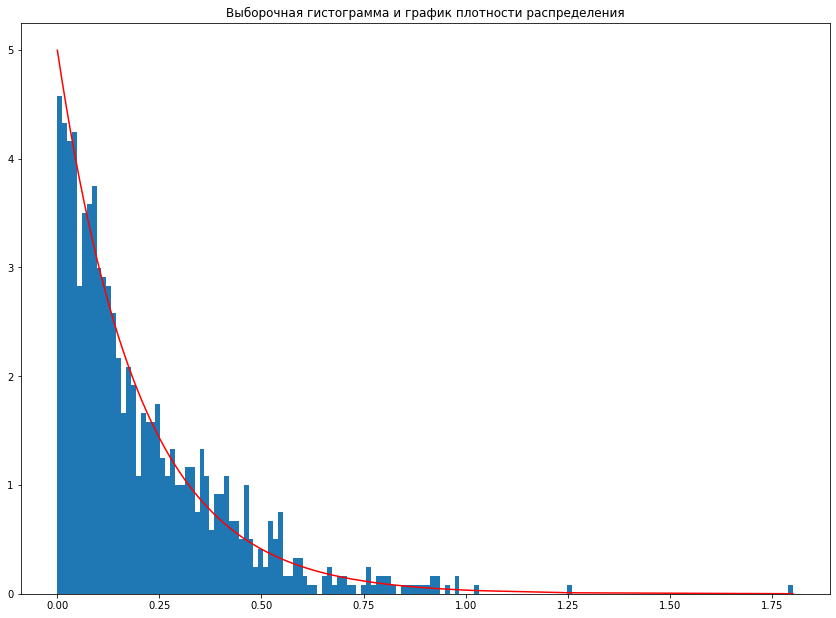

In [2]:
from math import log, exp

fig, ax = plt.subplots()
a = 5
rand = [np.random.rand() for i in range(1000)]
rand.sort()

rasp_x = [-1/a*log(1-rand[i]) for i in range(1000)]
plt.hist(rasp_x, bins = 150, density=True)

pl = [a*exp(-a*rasp_x[i]) for i in range(1000)]
plt.title("Выборочная гистограмма и график плотности распределения")
plt.plot(rasp_x, pl, color = 'red')

fig.set_size_inches(14.5, 10.5, forward=True)
plt.show()

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

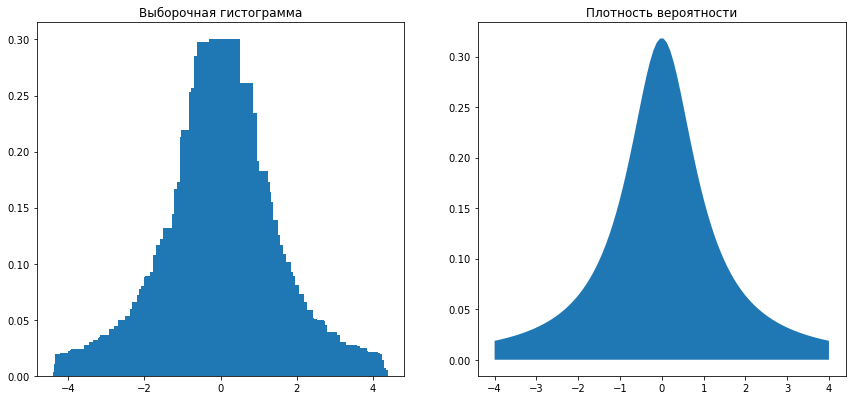

In [3]:
from scipy import stats
from math import pi

fig, ax = plt.subplots(1, 2)

rand = [8*np.random.rand()-4 for i in range(1000)]

my_cauchy = []
k=0
while k!=1000:
    y = 1/pi*np.random.rand()
    if y < 1/(pi*(1+rand[k]*rand[k])):
        my_cauchy.append(y)
        k+=1

ax[0].bar(rand, my_cauchy)
ax[0].set(title = 'Выборочная гистограмма')


dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
ax[1].fill_between(x, 0, dist.pdf(x))
ax[1].set(title = 'Плотность вероятности')


fig.set_size_inches(14.5, 6.5, forward=True)
plt.show()

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

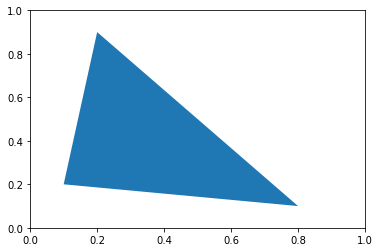

In [4]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

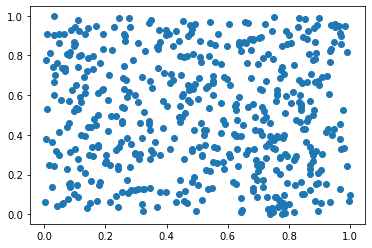

In [5]:
import math
xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])


plt.scatter(xrand, yrand)
plt.show()

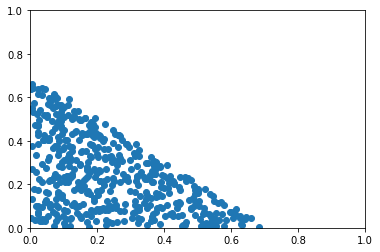

In [6]:
for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

plt.scatter(xrand, yrand)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.show()

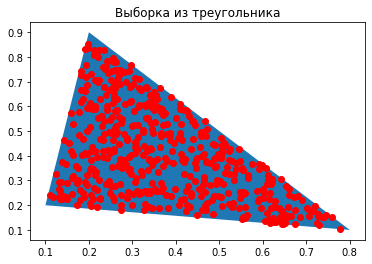

In [7]:
a = math.atan2(-1, 7)
x = xrand
y = yrand
xrand = x*math.cos(a)-y*math.sin(a)+0.1
yrand = x*math.sin(a)+y*math.cos(a)+0.2

plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(xrand, yrand, color = 'red')
plt.title("Выборка из треугольника")
plt.show()

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

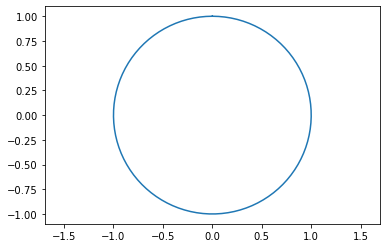

In [8]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

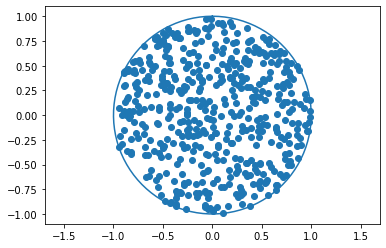

In [9]:
fi = np.array([2*pi*np.random.rand() for i in range(500)])
r = np.array([np.random.rand() for i in range(500)])
for i in range(500):
    x[i] = math.sqrt(r[i])*math.cos(fi[i])
    y[i] = math.sqrt(r[i])*math.sin(fi[i])
plt.plot(np.sin(t), np.cos(t))
plt.scatter(x, y)
plt.axis('equal')
plt.show()

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

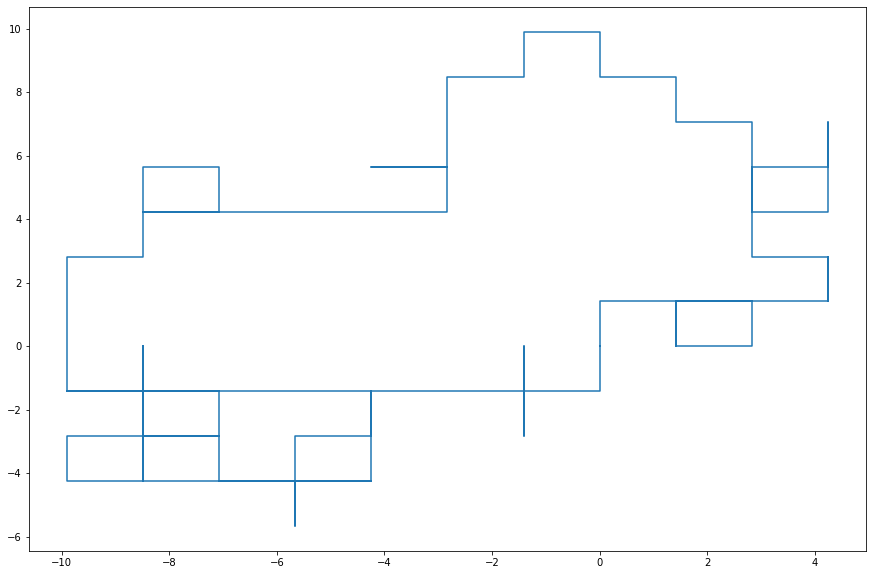

In [10]:
plt.figure(figsize=(15,10))


n = 100
def func(n):
    x_index = np.random.choice(n, n//2, replace = False)
    y_index = np.random.choice(n, n//2, replace = False)

    x = np.array([sum([[1,-1][i in x_index] for i in range(n)][:j]) for j in range(n+1)])
    y = np.array([sum([[1,-1][i in y_index] for i in range(n)][:j]) for j in range(n+1)])

    fi = math.sqrt(2)/2 # fi = cos(pi/4) = sin(pi/4)
    res_x = fi*(x - y)
    res_y = fi*(x + y)
    return res_x, res_y

x, y = func(n)
plt.plot(x, y)
plt.show()

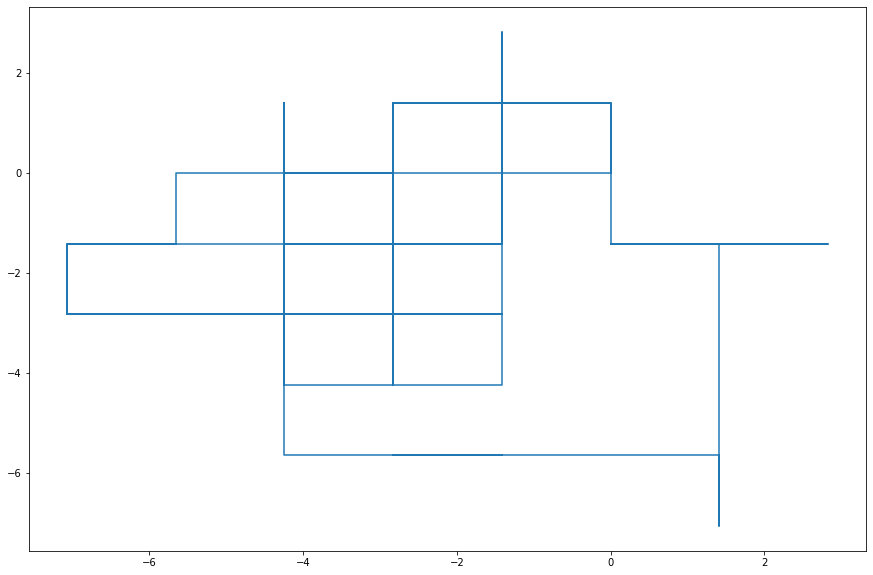

In [11]:
plt.figure(figsize=(15,10))
x, y = func(n)
plt.plot(x, y)
plt.show()

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

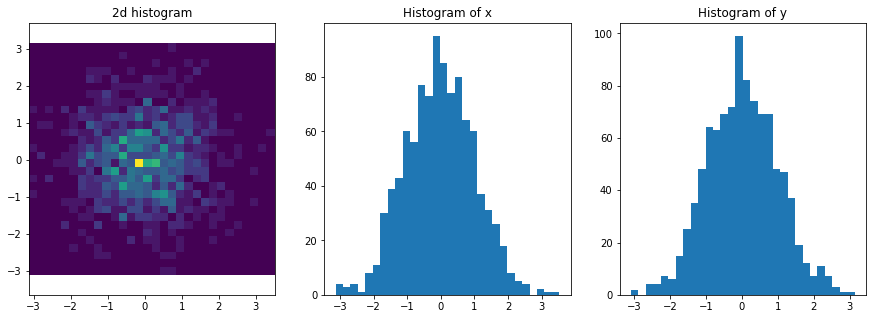

In [12]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Доказательство:

Посчитаем совместную плотность преобразованных величинx X, Y. 
В терминах X и Y как раз получим плотность равную 1/(2pi) * exp(-(X^2 + Y^2)/2).
В итоге мы и получили совместную плотность соответсвующую Гауссовскому многомерному стандартному распределению.

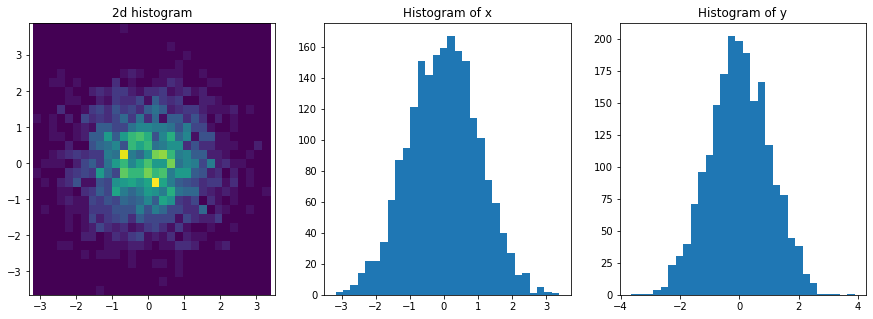

In [13]:
#Модифицруем метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos.
n = 2000
i = 0
a1 = []
a2 = []
while i<n:
    u = 2*np.random.rand()-1
    v = 2*np.random.rand()-1
    e = u**2+v**2
    if 0<e<=1:
        a1.append(u)
        a2.append(v)
        i+=1

a1 = np.array(a1)
a2 = np.array(a2)
        
e = a1**2+a2**2
r = np.sqrt(-2 * np.log(e)/e)
x = a1 * r
y = a2 * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

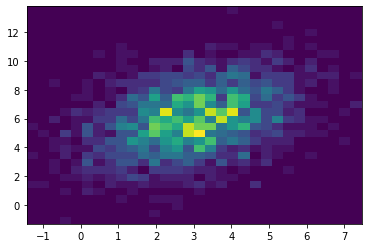

In [14]:
#Двумерное гауссовское распределение выглядит следующим образом: X = (ksi,eta) = A(x,y)+(m1,m2), где А - матрица 2х2, (m1,m2) - 
#вектор средних, то есть (m1,m2) = (3,6), а (х,у) - н.о.р. N(0,1). Чтобы определить числа a,b,c,d матрицы А = ((a, b), (c, d)),
#воспользуемся известной ковариационной матрицей ((2, 1), (1, 4)). Но поскольку у нас получится только 3 равенства (т.к. матрица
#ковариаций симметрична), для удобного счета положим d=2.


d = 2
#Т.к. Е(сх+dy)^2=4 =>c**2+d**2=4
c = np.sqrt(4-d**2)
#Т.к. E(ax+by)(cx+dy)=1 => ac+bd=1 (c=0)=> b = 1/d
b = 1/d
#Т.к. E(ax+by)**2=2 => a**2+b**2=2
a = np.sqrt(2-b**2)
ksi = a*x+b*y+3
eta = c*x+d*y+6
plt.hist2d(ksi, eta, bins=30)
plt.show()

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [15]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

np.shape(B)

(9, 9)

Пока не сделал, проблема с решением матричного уравнения А * A^t = B   (где А матрица перехода 9х9) 

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


In [16]:
n=2700000
p = 0

x = np.array([np.random.rand() for i in range(n)])
y = np.array([np.random.rand() for i in range(n)])

for i in range(n):    #n раз бросаем точку в первую четверть (квадрат 1х1)
    if (x[i]*x[i]+y[i]*y[i] < 1):
        p+=1   #если точка попала в сектор круга, считаем
        
print('Приближенное значение Pi =', format( round(p/n*4, 3) )) #делим на n и уможаем на 4
print('Ошибка {} %'.format( abs(p/n*4 - math.pi) / math.pi * 100))

Приближенное значение Pi = 3.142
Ошибка 0.006034156981246506 %


Пусть величина X равна 1, если точка попала в круг, и 0 иначе.

P{X=1} = p = pi/4, P{X=0} = q = 1 - pi/4. EX = p, DX = pq.

Пусть Y - сумма N таких величин. 

Тогда EY = Np, DY = Npq. 

Пусть Ksi = Y / N. E ksi = p. D Ksi = pq / N.

По неравеству Чебышева имеем: delta = P{|Ksi - E Ksi| > eps} < D Ksi / eps^2.

N<= pi/4 (1 - pi/4) / (delta * (eps/4)^2) < pi (4 - pi) / (delta * eps^2) < 2,7 / (delta * eps^2)

Тогда N <= 3/ (delta * eps^2), а по условию при delta = 0.01, eps = 0.001 : N <= 2,7 * 10^8

Очевидно, что точность повышается с ростом N, но для 2,7 * 10^8 мой пк не может посчитать пи, поэтому я взял N = 2,7 * 10^6 и точность получилась >99%

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [21]:
n = 100
def separation(n):
    B = 0
    for k in range(1,100):
        B+=k**n/np.math.factorial(k)
    B*=1/np.exp(1)
    P = np.array([k**n/(np.math.factorial(k)*np.exp(1)*B) for k in range(1,101)])
    Ch = [P[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<Ch[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    P = np.array([1/r for i in range(r)])
    Ch = [P[:i].sum() for i in range(1,r+1)]
    C = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if C[i]<Ch[k]:
                c.append(k)
                k=-1
            else:
                k+=1

In [33]:
#Используя ЗБЧ, оцениваем ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.
EX = 0
for i in range(5000):
    c = []
    separation(n)
    EX+=len(np.unique(c))
EX/=5000
print(int(EX)+1)

29
